In [1]:
import mujoco
import numpy
import mediapy as media
import matplotlib.pyplot as plt
import math
import yaml

In [2]:
xml='''
<mujoco>
    <option timestep=".001"/>
    <option gravity="0 0 -9.81"><flag gravity="enable"/></option>
    <compiler angle="degree"/>
    <worldbody>
        <light pos="0 0 1"/>
        <body name="A" pos="0 0 0" axisangle="0 1 0 0">
            <joint name="j1" type="hinge" axis="0 1 0" pos="0 0 0" stiffness="70" damping="6" limited="false" range="0 45"/>
            <geom type="box" size=".5 .05 .05" pos=".5 0 0" rgba="1 0 0 1" mass="1"/>
            <body name="B" pos="1 0 0" axisangle="0 1 0 0">
                <joint name="j2" type="hinge" axis="0 1 0" pos="0 0 0" stiffness="70" damping="6" limited="false" range="0 45"/>
                <geom type="box" size=".5 .05 .05" pos=".5 0 0" rgba="0 1 0 1"  mass="1"/>
            </body>        
        </body>
    </worldbody>
</mujoco>
'''

In [3]:
model = mujoco.MjModel.from_xml_string(xml)
data = mujoco.MjData(model)
renderer = mujoco.Renderer(model)

In [4]:
mujoco.mj_resetData(model,data)
data.qpos[0:2] = [45*math.pi/180,45*math.pi/180]
data.qvel[0:2] = [3,-3]
frames=[]

duration = 3
framerate =30

q = []
w = []
t = []
x = []

q.append(data.qpos.copy())
w.append(data.qvel.copy())
x.append(data.xpos.copy())
t.append(data.time)

while data.time<duration:

    mujoco.mj_step(model,data)
    q.append(data.qpos.copy())
    w.append(data.qvel.copy())
    x.append(data.xpos.copy())
    t.append(data.time)
    if len(frames)<data.time*framerate:
    
        renderer.update_scene(data)
        #renderer.update_scene(data,"world")
        pixels = renderer.render()
        frames.append(pixels)
        
media.show_video(frames,fps = framerate)

In [5]:
q = numpy.array(q)
w = numpy.array(w)
x = numpy.array(x)
t = numpy.array(t)

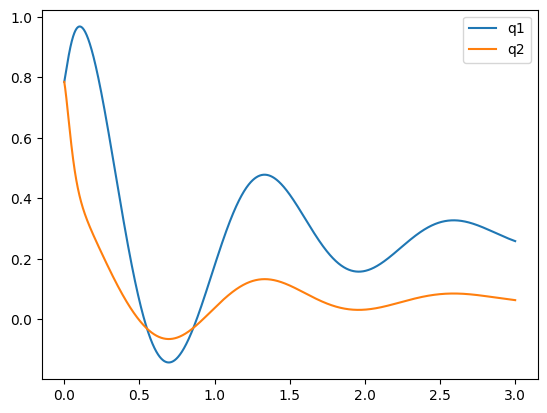

In [6]:
artist = plt.plot(t,q)
plt.legend(artist,['q1','q2'])

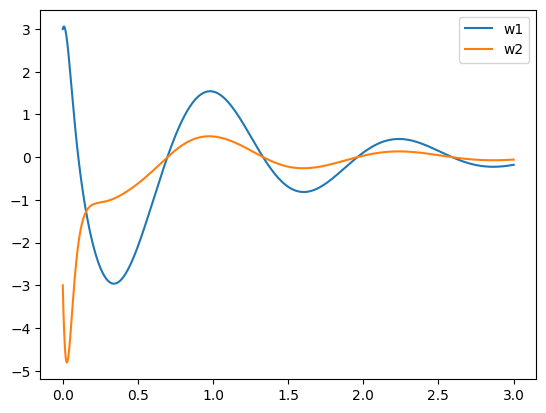

In [7]:
artist = plt.plot(t,w)
plt.legend(artist,['w1','w2'])

In [8]:
x.shape

(3002, 3, 3)

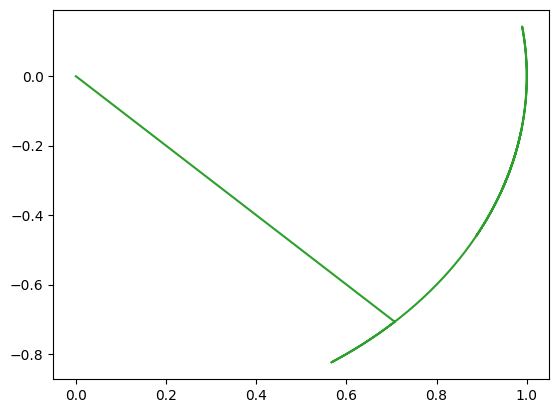

In [9]:
plt.figure()
plt.plot(x[:,:,0],x[:,:,2])

In [10]:
import yaml

data = {}
data['t']=t.tolist()
data['q']=q.tolist()
data['w']=w.tolist()

with open('hw3p2-data.yml','w') as f:
    yaml.dump(data,f)

with open('hw3p2-data.yml') as f:
    data = yaml.load(f,Loader=yaml.Loader)
    
q = numpy.array(data['q'])
t = numpy.array(data['t'])
w = numpy.array(data['w'])
    

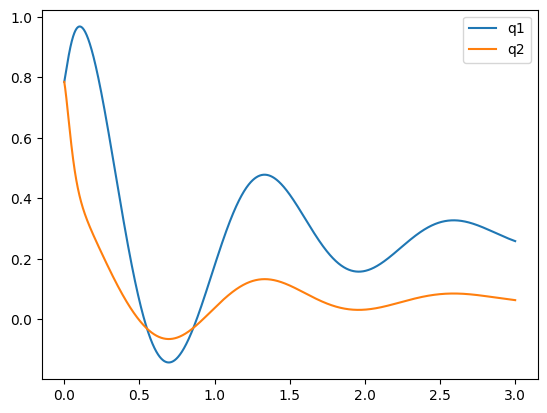

In [11]:
artist = plt.plot(t,q)
plt.legend(artist,['q1','q2'])